# Cleaning Data - Life and Death of The Avengers

## Objective

Practicing Data Munging skills by cleaning up after the Avengers.

## Data Set

![alt text](https://c1.staticflickr.com/9/8539/15770636041_d34f150d47_z.jpg)

The Avengers are a well-known and widely-loved team of superheroes in the Marvel universe that were originally introduced in the 1960's comic book series. The recent Disney movies re-popularized them, as part of the new Marvel Cinematic Universe.


Because the writers killed off and revived many of the superheroes, the team at FiveThirtyEight was curious to explore data from the [Marvel Wikia site](http://marvel.wikia.com/wiki/Main_Page) further. To learn how they collected their data, which is available in their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/avengers), read the write-up they published on the [FiveThirtyEight website](http://fivethirtyeight.com/features/avengers-death-comics-age-of-ultron/).

The data set named avengers.csv, which details the deaths of Marvel comic book characters between the time they joined the Avengers and April 30, 2015, the week before Secret Wars #1.

Here's the structures of the data:

Column | Definition
---|---------
`URL`| The URL of the comic character on the Marvel Wikia
`Name/Alias` | The full name or alias of the character
`Appearances` | The number of comic books that character appeared in as of April 30 
`Current?` | Is the member currently active on an avengers affiliated team?
`Gender` | The recorded gender of the character
`Probationary` | Sometimes the character was given probationary status as an Avenger, this is the date that happened
`Full/Reserve` | The month and year the character was introduced as a full or reserve member of the Avnegers
`Year` | The year the character was introduced as a full or reserve member of the Avengers
`Years since joining` | 2015 minus the year
`Honorary` | The status of the avenger, if they were given "Honorary" Avenger status, if they are simply in the "Academy," or "Full" otherwise
`Death1` | Yes if the Avenger died, No if not. 
`Return1` | Yes if the Avenger returned from their first death, No if  they did not, blank if not applicable
`Death2` | Yes if the Avenger died a second time after their revival, No if they did not, blank if not applicable
`Return2` | Yes if the Avenger returned from their second death, No if they did not, blank if not applicable
`Death3` | Yes if the Avenger died a third time after their second revival, No if they did not, blank if not applicable
`Return3` | Yes if the Avenger returned from their third death, No if they did not, blank if not applicable
`Death4` | Yes if the Avenger died a fourth time after their third revival, No if they did not, blank if not applicable
`Return4` | Yes if the Avenger returned from their fourth death, No if they did not, blank if not applicable
`Death5` | Yes if the Avenger died a fifth time after their fourth revival, No if they did not, blank if not applicable
`Return5` | Yes if the Avenger returned from their fifth death, No if they did not, blank if not applicable
`Notes` | Descriptions of deaths and resurrections. 


## Exploring the Data

In [24]:
import pandas as pd
avengers = pd.read_csv("C:/Users/i7/csv/avengers.csv", encoding="latin1")
print(avengers.head(5))
print(avengers.shape)

                                                 URL  \
0      http://marvel.wikia.com/Henry_Pym_(Earth-616)   
1  http://marvel.wikia.com/Janet_van_Dyne_(Earth-...   
2  http://marvel.wikia.com/Anthony_Stark_(Earth-616)   
3  http://marvel.wikia.com/Robert_Bruce_Banner_(E...   
4   http://marvel.wikia.com/Thor_Odinson_(Earth-616)   

                    Name/Alias  Appearances Current?  Gender  \
0    Henry Jonathan "Hank" Pym         1269      YES    MALE   
1               Janet van Dyne         1165      YES  FEMALE   
2  Anthony Edward "Tony" Stark         3068      YES    MALE   
3          Robert Bruce Banner         2089      YES    MALE   
4                 Thor Odinson         2402      YES    MALE   

  Probationary Introl Full/Reserve Avengers Intro  Year  Years since joining  \
0                 NaN                      Sep-63  1963                   52   
1                 NaN                      Sep-63  1963                   52   
2                 NaN                 

## Filtering Out Bad Data

Remove all of the Avengers introduced before 1960 from the dataframe. (the Avengers weren't introduced in the comic series until the 1960's!)

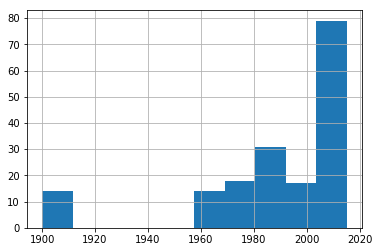

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
avengers["Year"].hist()

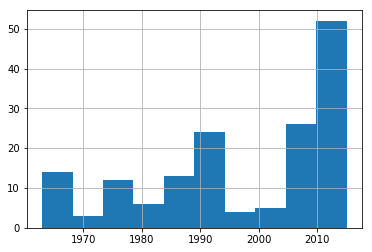

In [12]:
true_avengers = avengers[avengers["Year"] > 1959]
true_avengers["Year"].hist()

## Consolidating Deaths

Create a new column, Deaths, that contains the number of times each superhero died. 

In [25]:
def clean_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
    
    for each in columns:
        death = row[each]
        if pd.isnull(death) or death=='NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    return num_deaths

true_avengers['Deaths'] = true_avengers.apply(clean_deaths, axis=1)

## Verifying Years Since Joining

Verify that the Years since joining field accurately reflects the Year column. 

In [26]:
joined_accuracy_count  = int()
correct_joined_years = true_avengers[true_avengers['Years since joining'] == (2015 - true_avengers['Year'])]
joined_accuracy_count = len(correct_joined_years)
joined_accuracy_count

159